In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_columns', None)

In [2]:
features = pd.read_csv("fma_metadata/features.csv", header=[0,1,2], index_col=0)
echonest = pd.read_csv("fma_metadata/echonest.csv", header = [0,1,2], index_col=0)
tracks = pd.read_csv("fma_metadata/tracks.csv", header = [0,1], index_col=0)
genres = pd.read_csv("fma_metadata/genres.csv", index_col=0)

In [3]:
tracks.shape, features.shape, echonest.shape, genres.shape

((106574, 52), (106574, 518), (13129, 249), (163, 4))

In [4]:
tracks.sample(10)

album                                                            \
         comments         date_created        date_released        engineer   
track_id                                                                      
62312           0  2012-03-18 19:20:54  2012-03-19 00:00:00             NaN   
115654          0  2015-02-25 11:40:55  2010-09-27 00:00:00             NaN   
130595          0  2016-01-10 01:33:52                  NaN             NaN   
93587           0  2013-11-07 16:25:28  2013-11-07 00:00:00  Stu Rutherford   
100329         14  2014-02-28 10:03:48  2014-02-28 00:00:00             NaN   
94227           0  2013-11-18 12:09:49  2008-01-01 00:00:00             NaN   
128457          3  2015-11-27 12:14:59                  NaN             NaN   
95744           0  2009-04-02 22:52:48                  NaN             NaN   
53150           0  2011-08-28 15:52:25  2011-08-28 00:00:00         Marko-V   
128603          0  2015-11-30 08:45:02  2015-11-30 00:00:00             NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
62312            0  11301                                                NaN   
115654           2  17783                                                NaN   
130595           3  19661  <div id="descript" style="box-sizing: border-b...   
93587            1  15406  <p>Philadelphia's Far-Out Fangtooth drop by WF...   
100329           5  16098                                                NaN   
94227            1  15473                                                NaN   
128457          40  19382  <p>We build statues out of snow and weep to se...   
95744            0   2389  <p>Volvox were one of the most extraordinary b...   
53150            2   9949  <p>Exclusive mini-album for Free Music Archive...   
128603           2  19392  <p style="margin: 0px 0px 21px; padding: 0px; ...   

                                                                              \
         listens producer                                               tags   
track_id                                                                       
62312       2630      NaN  ['glitch', 'altered carbon', 'missqulater', 'b...   
115654     72871      NaN  ['classical', 'violin', 'modern', 'piano', 'in...   
130595     14952      NaN                                                 []   
93587       2392  Terre T                                                 []   
100329     58483      NaN                                                 []   
94227     128149      NaN                                                 []   
128457    447717      NaN                                                 []   
95744      13974      NaN                                                 []   
53150       4750  Marko-V                                                 []   
128603     25173      NaN  ['classwar karaoke', 'anthony donovan', 'jaan ...   

                                                                           \
                                                      title tracks   type   
track_id                                                                    
62312                                            Determined      7  Album   
115654                                            Aquarelle     11  Album   
130595                                        Bratislava EP      6  Album   
93587     Live on WFMU's The Cherry Blossom Clinic with ...      6  Album   
100329                       Classwar Karaoke - 0025 Survey    652  Album   
94227                              The Simple Life (Part 1)     22  Album   
128457                                   Chapter One / Cold      9    NaN   
95744                                  Egg, Pluto Pup & You     47  Album   
53150      Drunk for three weeks (FMA exclusive mini-al

In [5]:
features.head(10)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
26           -0.699535 -0.684158  0.048825  0.042659 -0.818967 -0.917123   
30           -0.721487 -0.848560  0.890904  0.088620 -0.445513 -1.271170   
46           -0.119708 -0.858814  2.362546  0.106584 -1.315912 -1.220354   
48           -1.054053  0.932339  0.528064 -1.035338 -1.000682 -1.119304   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   

feature                                                                  \
statistics                                                                
number            07        08        09         10        11        12   
track_id                                                                  
2           1.481593  2.691455  0.866868   1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103   0.619185  1.038253  1.292235   
5          -0.923192 -0.927232  0.666617   1.038546  0.268932  1.125141   
10          1.770694  1.604566  0.521217   1.982386  4.326824  1.300406   
20         -0.289294 -0.816410  0.043851  -0.804761 -0.990958 -0.430381   
26         -0.901834 -0.066845 -0.291037  -0.861782 -0.670444 -0.994519   
30         -1.240190 -1.343765 -0.905600   2.671522  1.028880 -0.447359   
46         -1.668162 -0.516033 -0.536395  11.025053  9.949965 -0.883550   
48          1.166990 -1.002603 -1.094999  -0.725826 -1.124131 -0.805309   
134         1.199204 -0.175223  0.925482   1.438509  0.123328  0.797199   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
10          0.461840  0.540411  0.446708  0.647553  0.591908  0.513306   
20          0.652864  0.676290  0.670288  0.598666  0.653607  0.697645   
26          0.698460  0.568883  0.612372  0.663034  0.629511  0.673306   
30          0.704172  0.650937  0.675779  0.624805  0.672531  0.701039   
46          0.718440  0.639204  0.464619  0.391701  0.594806  0.654119   
48          0.616042  0.704125  0.691598  0.672847  0.714571  0.607831   
134         0.670821  0.596978  0.614920  0.535825  0.617804  0.623351   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
10          0.651501  0.516887  0.511479  0.478263  0.638766  0.638495   
20          0.664929  0.686563  0.635117  0.667393  0.689589  0.683196   
26          0.531447  0.649430  0.668824  0.639006  0.682934  0.643088   
30          0.710622  0.682821  0.612866  0.668518  0.581148  0.669262   
46          0.528179  0.693499  0

# EDA

### What are the top genres in this dataset? What does their distribution look like? How many "top genres" are NA?

#### the full dataset has NaN for about half of the genre_top feature

In [6]:
# for the entire set 
tracks.loc[:,('track','genre_top')].value_counts(dropna=False)

NaN                    56976
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

In [7]:
# for the small subset 
small = tracks['set','subset'] == 'small' # creates a mask that will select for tracks marked as being part of the 'small' dataset
tracks.loc[small,('track','genre_top')].value_counts(dropna=False)

International    1000
Rock             1000
Hip-Hop          1000
Pop              1000
Experimental     1000
Folk             1000
Instrumental     1000
Electronic       1000
Name: (track, genre_top), dtype: int64

In [8]:
# for the medium subset 
medium = tracks['set','subset'] == 'medium' # creates a mask that will select for tracks marked as being part of the 'medium' dataset
tracks.loc[medium,('track','genre_top')].value_counts(dropna=False)

Rock                   6103
Electronic             5314
Experimental           1251
Hip-Hop                1201
Classical               619
Folk                    519
Old-Time / Historic     510
Jazz                    384
Instrumental            350
Pop                     186
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
International            18
Name: (track, genre_top), dtype: int64

In [9]:
# Create a large subset that drops rows with NaN in the genre_top column
tracks['track','genre_top'] = tracks['track','genre_top'].fillna(0) 
large = tracks['track','genre_top'] != 0 
tracks.loc[large,('track','genre_top')].value_counts(dropna=False)

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

#### Notice there's a huge class imbalance in the largest dataset

In [10]:
# create a large subset with only genres that have at least 1000 tracks 
large_b = ((tracks['track','genre_top'] != 0) & ((tracks['track','genre_top'] == ("Rock"))
                                                 |(tracks['track','genre_top'] == ("Experimental"))
                                                 |(tracks['track','genre_top'] == ("Electronic"))
                                                 |(tracks['track','genre_top'] == ("Hip_Hop"))
                                                 |(tracks['track','genre_top'] == ("Folk"))
                                                 |(tracks['track','genre_top'] == ("Pop"))
                                                 |(tracks['track','genre_top'] == ("Instrumental"))
                                                 |(tracks['track','genre_top'] == ("International"))
                                                 |(tracks['track','genre_top'] == ("Classical"))))
                                        
tracks.loc[large_b,('track','genre_top')].value_counts(dropna=False)

Rock             14182
Experimental     10608
Electronic        9372
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Name: (track, genre_top), dtype: int64

### What are the major features in this dataset?

In [11]:
feature_list = features.columns.levels[0].tolist()
feature_list

['chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr']

# Data Analysis


In [12]:
accuracy_scores = pd.DataFrame(index=feature_list)


### K nearest neighbors

In [13]:
dim_col = []
new_col = []
for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, (feature)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=200)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
    dim_col.append(X.shape[1])
#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
accuracy_scores.insert(0,"dim", dim_col, True)
accuracy_scores.insert(1,"knn", new_col, True)
new_col

[0.46, 0.491, 0.515, 0.64, 0.498, 0.54, 0.55, 0.598, 0.548, 0.481, 0.555]

In [14]:
# Try combining features
y = tracks.loc[small, ('track','genre_top')]
X = features.loc[small, ['spectral_contrast','mfcc','spectral_rolloff']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('spectral_contrast + mfcc accuracy score: ', metrics.accuracy_score(y_test, y_pred).round(3))


spectral_contrast + mfcc accuracy score:  0.31


### Logistic Regression

In [15]:
new_col = []
for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
accuracy_scores.insert(2,"lr", new_col, True)

In [16]:
new_col

[0.499, 0.502, 0.552, 0.698, 0.495, 0.502, 0.53, 0.634, 0.524, 0.51, 0.535]

### Decision Tree

In [17]:
new_col = []
for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    DT = DecisionTreeClassifier(max_depth=5)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))

#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
accuracy_scores.insert(3,"dt", new_col, True)

### Random Forest

In [18]:
new_col = []

for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    RF = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))

accuracy_scores.insert(4,"rf", new_col, True)

### Naive Bayes

In [19]:
new_col = []
from sklearn.naive_bayes import GaussianNB
for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    nbc_base = GaussianNB()
    nbc_base.fit(X_train, y_train)
    y_pred = nbc_base.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))

#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
accuracy_scores.insert(5,"nb", new_col, True)

### One vs Rest Classifier

In [20]:
new_col = []
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

for feature in feature_list:
    y = tracks.loc[medium, ('track','genre_top')]
    X = features.loc[medium, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    SVCrbf = SVC(kernel='rbf')
    SVCrbf.fit(X_train, y_train)
    y_pred = SVCrbf.predict(X_test)
    new_col.append(metrics.accuracy_score(y_test, y_pred).round(3))

#     print(feature, "accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
accuracy_scores.insert(6,"svc", new_col, True)


In [21]:
accuracy_scores

,dim,knn,lr,dt,rf,nb,svc
chroma_cens,84,0.460,0.499,0.440,0.432,0.133,0.523
chroma_cqt,84,0.491,0.502,0.457,0.466,0.037,0.543
chroma_stft,84,0.515,0.552,0.501,0.494,0.095,0.592
mfcc,140,0.640,0.698,0.595,0.564,0.489,0.722
rmse,7,0.498,0.495,0.486,0.501,0.107,0.511
spectral_bandwidth,7,0.540,0.502,0.532,0.538,0.434,0.551
spectral_centroid,7,0.550,0.530,0.539,0.545,0.410,0.564
spectral_contrast,49,0.598,0.634,0.550,0.555,0.435,0.669
spectral_rolloff,7,0.548,0.524,0.555,0.557,0.356,0.570
tonnetz,42,0.481,0.510,0.468,0.461,0.304,0.541


### Confusion Matrix

In [22]:
# Logistic Regression with MFCC had one of the highest accuracy accuracy_scores, use for a confusion matrix
y = tracks.loc[medium, ('track','genre_top')]
X = features.loc[medium, 'mfcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("mfcc accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))


mfcc accuracy score:  0.696


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
sorted(tracks.loc[medium,('track','genre_top')].unique())

['Blues',
 'Classical',
 'Country',
 'Easy Listening',
 'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Jazz',
 'Old-Time / Historic',
 'Pop',
 'Rock',
 'Soul-RnB',
 'Spoken']

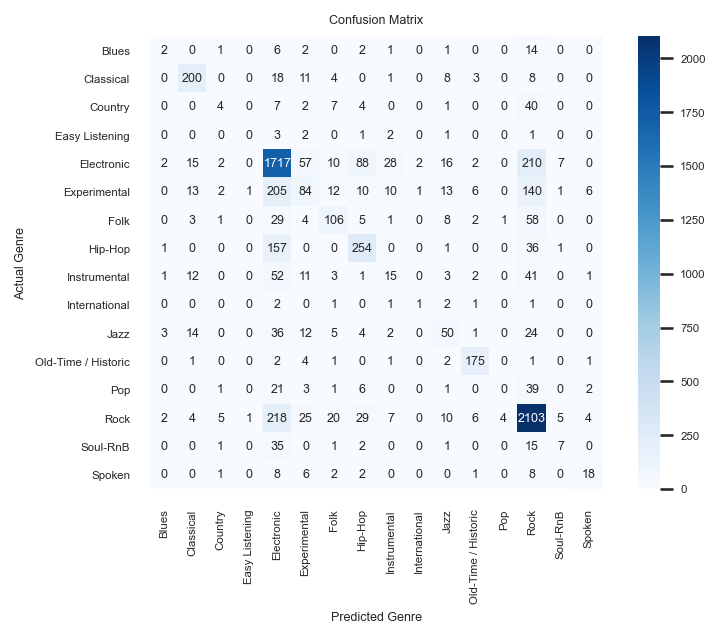

In [24]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.set(font_scale=0.5)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt = "d",
           xticklabels=['Blues','Classical','Country','Easy Listening','Electronic','Experimental','Folk',
                        'Hip-Hop','Instrumental','International','Jazz','Old-Time / Historic','Pop','Rock',
                        'Soul-RnB','Spoken'],
           yticklabels=['Blues','Classical','Country','Easy Listening','Electronic','Experimental','Folk',
                        'Hip-Hop','Instrumental','International','Jazz','Old-Time / Historic','Pop','Rock',
                        'Soul-RnB','Spoken'])
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix')
plt.yticks(rotation=0);

### Conclusion - Next Steps
- The confusion matrix shows that some genres (Blues, Country, Easy Listening, International, Pop, Soul-RnB) 
are entirely misclassified (zero true positives). They are mostly classified as the top two most prevalent genres (Rock, Electronic). Most of these have the lowest numbers of tracks in the medium sized dataset:

In [25]:
Rock                   6103
Electronic             5314
Experimental           1251
Hip-Hop                1201
Classical               619
Folk                    519
Old-Time / Historic     510
Jazz                    384
Instrumental            350
Pop                     186
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
International            18

SyntaxError: invalid syntax (<ipython-input-25-a38581eaf22c>, line 1)

- A next step would be to use the larger dataset and remove the genres with under 1000 tracks of data. 
- Since there is still a significant class imbalance (even with eliminating genres with under 1000 tracks), I will try adding class weights for the minority classes to see if that improves recall. I could also try oversampling the minority classes. I think that in some cases where the genres overlap a lot, this probably won't have much effect.
- A couple of other observations:
    - Old Time / Historic and Classical have a really good true positive rate, despite not having many tracks of data. It would be interesting to look at what features differentiate each of them the most from the other genres.
    - There seems to be a lot of overlap between Rock and Electronic music, as they are both frequently misclassified as each other. It would be interesting to look at what features differentiate / correlate them with each other.
    - Pop wasn't identified correctly at all. Instead it was predicted as Rock or Electronic.

- I will do testing/training/validation using Cross Validation methods
- Since there is overlap in some of the genres, I could predict the top 3 genres a track is likely to have and determine whether the actual genre is in those top 3.

### I did a bit of research into the audio features:

- chroma features capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation

- Mel-frequency cepstral coefficients (MFCCs) MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone. In the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal (cepstral) spectrum.

#### It makes sense that MFCC has the highest accuracy scores among all the other features. It has both the highest number of dimensions and it is a feature that was developed to approximate the human auditory experience.

- The other features here might do well in differentiating certain genres, but overall they have a similar performance across the various classifiers I used. 
- I would like to see if I could use some of the features to classify some of the harder to differentiate genres (Rock / Electronic / Pop), without overfitting.

In [ ]:
genre_fig = tracks.loc[:,('track','genre_top')].value_counts(dropna=False).sort_values().plot(kind='barh',figsize=(6,6),fontsize=10)
plt.savefig('genre_fig.jpg', dpi = 1000, bbox_inches="tight");

In [ ]:
genres[genres.parent == 5]


In [ ]:
features